## Observations and Insights 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
dataset_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Check the number of mice. <----The instructions say mice, but do you really mean records?
# Mice
unique_mice = dataset_df['Mouse ID'].unique()
unique_mouse_count = len(unique_mice)
print("Number of unique mice: " + str(unique_mouse_count))
# Records
num_records = len(dataset_df)
print("Number of records in dataset: " + str(num_records))


Number of unique mice: 249
Number of records in dataset: 1893


In [21]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_df = dataset_df[dataset_df.duplicated()]
duplicated_df_index = duplicated_df.index[0]

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupe_dataset_df = dataset_df.drop([duplicated_df_index])
no_dupe_dataset_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Check the number of mice in the clean DataFrame. <---- Once again, is this supposed to be records instead of mice?
print("Number of unique mice: " + str(len(no_dupe_dataset_df['Mouse ID'].unique())))
print("Number of records in dataset: " + str(len(no_dupe_dataset_df)))

Number of unique mice: 249
Number of records in dataset: 1892


## Summary Statistics

In [25]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = no_dupe_dataset_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'].reset_index(name="mean")
median = no_dupe_dataset_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'].reset_index(name="median")
variance = no_dupe_dataset_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'].reset_index(name="variance")
std_dev = no_dupe_dataset_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'].reset_index(name="std_dev")
sem = no_dupe_dataset_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'].reset_index(name="sem")

merge1 = pd.merge(mean, median, on = 'Drug Regimen')
merge2 = pd.merge(merge1, variance, on = 'Drug Regimen')
merge3 = pd.merge(merge2, std_dev, on = 'Drug Regimen')
summary_stats_df = pd.merge(merge3, sem, on = 'Drug Regimen')

summary_stats_df

,Drug Regimen,mean,median,variance,std_dev,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

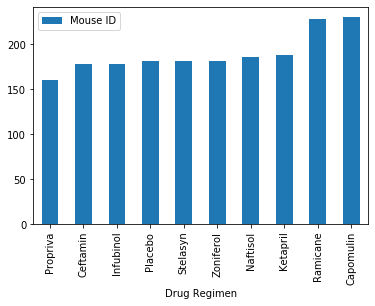

In [39]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 
num_mice_per_regimen_df = no_dupe_dataset_df.groupby(['Drug Regimen']).count().sort_values(by=['Mouse ID'])

num_mice_per_regimen_df.plot.bar(y='Mouse ID', rot=90)
## Note: this plot will be identical to the one that uses Pyplot

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

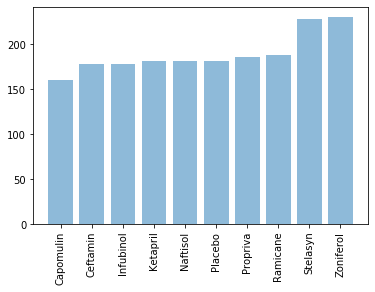

In [38]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.
mouse_count = num_mice_per_regimen_df['Mouse ID']
regimen = summary_stats_df['Drug Regimen']

#y_pos = np.arange(len(mouse_count))
plt.bar(regimen, mouse_count, align='center', alpha=0.5,)
plt.xticks(rotation='vertical')
##  Note: this plot will be identical to the one that uses Pandas

In [ ]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

## Note: this plot will be identical to the one that uses Pyplot

In [ ]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
